# 0. Install Dependencies

In [ ]:
#Install stabe-baselines3 if not installed
!pip install 'stable-baselines3[extra]'

In [1]:
#Importing required dependencies
import os
import gym as gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

# 1. Testing if the environment is working

In [2]:
env_name = 'LunarLander-v2'
env = gym.make(env_name, enable_wind = True, wind_power = 20.0, turbulence_power = 2.0)
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0
    
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, truncated, info = env.step(action)
        score += reward
    print('Episode:{} Score:{}'.format(episode, score))
#env.close()

Episode:1 Score:-729.1427814156915
Episode:2 Score:-224.84943438155517
Episode:3 Score:-72.01103151644581
Episode:4 Score:-226.7300725846324
Episode:5 Score:-216.52329566531722


/Users/morhaflababidi/opt/anaconda3/lib/python3.9/site-packages/gym/envs/box2d/lunar_lander.py:604: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("LunarLander-v2", render_mode="rgb_array")
  gym.logger.warn(


# 2. Training
### Based on stablebaselines-3 official documentation, Gym official documentation, and Nicholas Renotte's RL course on Youtube

In [3]:
log_path = os.path.join('Training', 'Logs')

In [4]:
log_path

'Training/Logs'

In [5]:
#Instantiating the environment with the adversarial conditions
env = gym.make(env_name, enable_wind = True, wind_power = 20.0, turbulence_power = 2.0 )

"""
Vectorizing the environment so that the neural network is fed with batches of vectors from game
episodes instead of one episode at a time
"""
env = DummyVecEnv([lambda: Monitor(env, log_path)])

"""
Instantiating the RL algorithm, with Multi layer perceptron as a function approximator.
Training metrics are saved to the log_path file: Logs
"""

model = PPO('MlpPolicy', env, verbose=1, tensorboard_log=log_path)

Using cpu device


In [6]:
#Training the model for 1 Million timestep.
model.learn(total_timesteps=1000000)

2023-04-27 09:16:25.238400: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Logging to Training/Logs/PPO_2
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 87.3     |
|    ep_rew_mean     | -353     |
| time/              |          |
|    fps             | 183      |
|    iterations      | 1        |
|    time_elapsed    | 11       |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 87.9         |
|    ep_rew_mean          | -316         |
| time/                   |              |
|    fps                  | 275          |
|    iterations           | 2            |
|    time_elapsed         | 14           |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0051749176 |
|    clip_fraction        | 0.031        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   |

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 99.6        |
|    ep_rew_mean          | -219        |
| time/                   |             |
|    fps                  | 681         |
|    iterations           | 11          |
|    time_elapsed         | 33          |
|    total_timesteps      | 22528       |
| train/                  |             |
|    approx_kl            | 0.014785225 |
|    clip_fraction        | 0.163       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.25       |
|    explained_variance   | -0.000355   |
|    learning_rate        | 0.0003      |
|    loss                 | 294         |
|    n_updates            | 100         |
|    policy_gradient_loss | -0.00923    |
|    value_loss           | 694         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 99.2  

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 110         |
|    ep_rew_mean          | -127        |
| time/                   |             |
|    fps                  | 783         |
|    iterations           | 21          |
|    time_elapsed         | 54          |
|    total_timesteps      | 43008       |
| train/                  |             |
|    approx_kl            | 0.006770921 |
|    clip_fraction        | 0.076       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.11       |
|    explained_variance   | 4.17e-06    |
|    learning_rate        | 0.0003      |
|    loss                 | 151         |
|    n_updates            | 200         |
|    policy_gradient_loss | -0.00328    |
|    value_loss           | 441         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 114 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 158         |
|    ep_rew_mean          | -115        |
| time/                   |             |
|    fps                  | 819         |
|    iterations           | 31          |
|    time_elapsed         | 77          |
|    total_timesteps      | 63488       |
| train/                  |             |
|    approx_kl            | 0.007759139 |
|    clip_fraction        | 0.0643      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.937      |
|    explained_variance   | 1.19e-07    |
|    learning_rate        | 0.0003      |
|    loss                 | 280         |
|    n_updates            | 300         |
|    policy_gradient_loss | -0.00573    |
|    value_loss           | 520         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 157   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 209          |
|    ep_rew_mean          | -117         |
| time/                   |              |
|    fps                  | 817          |
|    iterations           | 41           |
|    time_elapsed         | 102          |
|    total_timesteps      | 83968        |
| train/                  |              |
|    approx_kl            | 0.0020499665 |
|    clip_fraction        | 0.000244     |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.866       |
|    explained_variance   | 0.0658       |
|    learning_rate        | 0.0003       |
|    loss                 | 386          |
|    n_updates            | 400          |
|    policy_gradient_loss | -0.00119     |
|    value_loss           | 663          |
------------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mea

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 234         |
|    ep_rew_mean          | -101        |
| time/                   |             |
|    fps                  | 811         |
|    iterations           | 51          |
|    time_elapsed         | 128         |
|    total_timesteps      | 104448      |
| train/                  |             |
|    approx_kl            | 0.007391354 |
|    clip_fraction        | 0.0436      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.806      |
|    explained_variance   | -0.0261     |
|    learning_rate        | 0.0003      |
|    loss                 | 140         |
|    n_updates            | 500         |
|    policy_gradient_loss | -0.00619    |
|    value_loss           | 351         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 222 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 238          |
|    ep_rew_mean          | -75.4        |
| time/                   |              |
|    fps                  | 810          |
|    iterations           | 61           |
|    time_elapsed         | 154          |
|    total_timesteps      | 124928       |
| train/                  |              |
|    approx_kl            | 0.0056765135 |
|    clip_fraction        | 0.0299       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.769       |
|    explained_variance   | 0.289        |
|    learning_rate        | 0.0003       |
|    loss                 | 311          |
|    n_updates            | 600          |
|    policy_gradient_loss | -0.00658     |
|    value_loss           | 412          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 265          |
|    ep_rew_mean          | -80          |
| time/                   |              |
|    fps                  | 803          |
|    iterations           | 71           |
|    time_elapsed         | 181          |
|    total_timesteps      | 145408       |
| train/                  |              |
|    approx_kl            | 0.0063570384 |
|    clip_fraction        | 0.0601       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.689       |
|    explained_variance   | 0.53         |
|    learning_rate        | 0.0003       |
|    loss                 | 127          |
|    n_updates            | 700          |
|    policy_gradient_loss | -0.00571     |
|    value_loss           | 252          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 273          |
|    ep_rew_mean          | -52.3        |
| time/                   |              |
|    fps                  | 800          |
|    iterations           | 81           |
|    time_elapsed         | 207          |
|    total_timesteps      | 165888       |
| train/                  |              |
|    approx_kl            | 0.0040855836 |
|    clip_fraction        | 0.0244       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.637       |
|    explained_variance   | 0.418        |
|    learning_rate        | 0.0003       |
|    loss                 | 77.5         |
|    n_updates            | 800          |
|    policy_gradient_loss | -0.00112     |
|    value_loss           | 309          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 219          |
|    ep_rew_mean          | -31.1        |
| time/                   |              |
|    fps                  | 801          |
|    iterations           | 91           |
|    time_elapsed         | 232          |
|    total_timesteps      | 186368       |
| train/                  |              |
|    approx_kl            | 0.0040915855 |
|    clip_fraction        | 0.0378       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.628       |
|    explained_variance   | 0.642        |
|    learning_rate        | 0.0003       |
|    loss                 | 96           |
|    n_updates            | 900          |
|    policy_gradient_loss | -0.00471     |
|    value_loss           | 226          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 242          |
|    ep_rew_mean          | -15          |
| time/                   |              |
|    fps                  | 788          |
|    iterations           | 101          |
|    time_elapsed         | 262          |
|    total_timesteps      | 206848       |
| train/                  |              |
|    approx_kl            | 0.0047524413 |
|    clip_fraction        | 0.0371       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.654       |
|    explained_variance   | 0.644        |
|    learning_rate        | 0.0003       |
|    loss                 | 68.2         |
|    n_updates            | 1000         |
|    policy_gradient_loss | -0.00603     |
|    value_loss           | 234          |
------------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mea

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 243          |
|    ep_rew_mean          | -4.2         |
| time/                   |              |
|    fps                  | 758          |
|    iterations           | 111          |
|    time_elapsed         | 299          |
|    total_timesteps      | 227328       |
| train/                  |              |
|    approx_kl            | 0.0058345348 |
|    clip_fraction        | 0.0278       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.688       |
|    explained_variance   | 0.577        |
|    learning_rate        | 0.0003       |
|    loss                 | 90.5         |
|    n_updates            | 1100         |
|    policy_gradient_loss | -0.00469     |
|    value_loss           | 302          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 254          |
|    ep_rew_mean          | 14.7         |
| time/                   |              |
|    fps                  | 742          |
|    iterations           | 121          |
|    time_elapsed         | 333          |
|    total_timesteps      | 247808       |
| train/                  |              |
|    approx_kl            | 0.0084448755 |
|    clip_fraction        | 0.0789       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.716       |
|    explained_variance   | 0.587        |
|    learning_rate        | 0.0003       |
|    loss                 | 32.7         |
|    n_updates            | 1200         |
|    policy_gradient_loss | -0.00317     |
|    value_loss           | 122          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 264         |
|    ep_rew_mean          | 44.9        |
| time/                   |             |
|    fps                  | 730         |
|    iterations           | 131         |
|    time_elapsed         | 367         |
|    total_timesteps      | 268288      |
| train/                  |             |
|    approx_kl            | 0.005681725 |
|    clip_fraction        | 0.0365      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.541      |
|    explained_variance   | 0.637       |
|    learning_rate        | 0.0003      |
|    loss                 | 43.1        |
|    n_updates            | 1300        |
|    policy_gradient_loss | -0.00498    |
|    value_loss           | 214         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 247 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 234          |
|    ep_rew_mean          | 21.2         |
| time/                   |              |
|    fps                  | 721          |
|    iterations           | 141          |
|    time_elapsed         | 400          |
|    total_timesteps      | 288768       |
| train/                  |              |
|    approx_kl            | 0.0045871567 |
|    clip_fraction        | 0.049        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.636       |
|    explained_variance   | 0.792        |
|    learning_rate        | 0.0003       |
|    loss                 | 58.8         |
|    n_updates            | 1400         |
|    policy_gradient_loss | -0.00459     |
|    value_loss           | 226          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 263          |
|    ep_rew_mean          | 30.8         |
| time/                   |              |
|    fps                  | 710          |
|    iterations           | 151          |
|    time_elapsed         | 435          |
|    total_timesteps      | 309248       |
| train/                  |              |
|    approx_kl            | 0.0033753486 |
|    clip_fraction        | 0.0215       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.551       |
|    explained_variance   | 0.74         |
|    learning_rate        | 0.0003       |
|    loss                 | 86.8         |
|    n_updates            | 1500         |
|    policy_gradient_loss | -0.00203     |
|    value_loss           | 244          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 275         |
|    ep_rew_mean          | 52.4        |
| time/                   |             |
|    fps                  | 699         |
|    iterations           | 161         |
|    time_elapsed         | 471         |
|    total_timesteps      | 329728      |
| train/                  |             |
|    approx_kl            | 0.004003116 |
|    clip_fraction        | 0.0317      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.519      |
|    explained_variance   | 0.483       |
|    learning_rate        | 0.0003      |
|    loss                 | 70.1        |
|    n_updates            | 1600        |
|    policy_gradient_loss | -0.00577    |
|    value_loss           | 310         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 279   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 268         |
|    ep_rew_mean          | 56.2        |
| time/                   |             |
|    fps                  | 682         |
|    iterations           | 171         |
|    time_elapsed         | 513         |
|    total_timesteps      | 350208      |
| train/                  |             |
|    approx_kl            | 0.004358559 |
|    clip_fraction        | 0.0254      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.622      |
|    explained_variance   | 0.641       |
|    learning_rate        | 0.0003      |
|    loss                 | 209         |
|    n_updates            | 1700        |
|    policy_gradient_loss | -0.00427    |
|    value_loss           | 300         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 270 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 278          |
|    ep_rew_mean          | 45.1         |
| time/                   |              |
|    fps                  | 663          |
|    iterations           | 181          |
|    time_elapsed         | 558          |
|    total_timesteps      | 370688       |
| train/                  |              |
|    approx_kl            | 0.0052276654 |
|    clip_fraction        | 0.0446       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.485       |
|    explained_variance   | 0.713        |
|    learning_rate        | 0.0003       |
|    loss                 | 49.8         |
|    n_updates            | 1800         |
|    policy_gradient_loss | -0.00482     |
|    value_loss           | 123          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 296          |
|    ep_rew_mean          | 60.7         |
| time/                   |              |
|    fps                  | 643          |
|    iterations           | 191          |
|    time_elapsed         | 607          |
|    total_timesteps      | 391168       |
| train/                  |              |
|    approx_kl            | 0.0056323223 |
|    clip_fraction        | 0.0578       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.604       |
|    explained_variance   | 0.851        |
|    learning_rate        | 0.0003       |
|    loss                 | 30           |
|    n_updates            | 1900         |
|    policy_gradient_loss | -0.00323     |
|    value_loss           | 98.8         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 287         |
|    ep_rew_mean          | 58.8        |
| time/                   |             |
|    fps                  | 631         |
|    iterations           | 201         |
|    time_elapsed         | 652         |
|    total_timesteps      | 411648      |
| train/                  |             |
|    approx_kl            | 0.005503649 |
|    clip_fraction        | 0.0422      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.506      |
|    explained_variance   | 0.716       |
|    learning_rate        | 0.0003      |
|    loss                 | 63.3        |
|    n_updates            | 2000        |
|    policy_gradient_loss | -0.00362    |
|    value_loss           | 199         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 284 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 265         |
|    ep_rew_mean          | 57.8        |
| time/                   |             |
|    fps                  | 616         |
|    iterations           | 211         |
|    time_elapsed         | 700         |
|    total_timesteps      | 432128      |
| train/                  |             |
|    approx_kl            | 0.010397284 |
|    clip_fraction        | 0.1         |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.651      |
|    explained_variance   | 0.797       |
|    learning_rate        | 0.0003      |
|    loss                 | 18.1        |
|    n_updates            | 2100        |
|    policy_gradient_loss | -0.000466   |
|    value_loss           | 98.5        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 265 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 272         |
|    ep_rew_mean          | 46.6        |
| time/                   |             |
|    fps                  | 606         |
|    iterations           | 221         |
|    time_elapsed         | 746         |
|    total_timesteps      | 452608      |
| train/                  |             |
|    approx_kl            | 0.005661579 |
|    clip_fraction        | 0.0361      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.593      |
|    explained_variance   | 0.687       |
|    learning_rate        | 0.0003      |
|    loss                 | 17.5        |
|    n_updates            | 2200        |
|    policy_gradient_loss | -0.00226    |
|    value_loss           | 118         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 266 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 285         |
|    ep_rew_mean          | 47.2        |
| time/                   |             |
|    fps                  | 597         |
|    iterations           | 231         |
|    time_elapsed         | 791         |
|    total_timesteps      | 473088      |
| train/                  |             |
|    approx_kl            | 0.007131641 |
|    clip_fraction        | 0.0587      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.566      |
|    explained_variance   | 0.725       |
|    learning_rate        | 0.0003      |
|    loss                 | 15.5        |
|    n_updates            | 2300        |
|    policy_gradient_loss | -0.00318    |
|    value_loss           | 85.7        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 287   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 287          |
|    ep_rew_mean          | 56.8         |
| time/                   |              |
|    fps                  | 586          |
|    iterations           | 241          |
|    time_elapsed         | 841          |
|    total_timesteps      | 493568       |
| train/                  |              |
|    approx_kl            | 0.0062935892 |
|    clip_fraction        | 0.0596       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.565       |
|    explained_variance   | 0.784        |
|    learning_rate        | 0.0003       |
|    loss                 | 51.9         |
|    n_updates            | 2400         |
|    policy_gradient_loss | -0.00211     |
|    value_loss           | 117          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 287         |
|    ep_rew_mean          | 82.4        |
| time/                   |             |
|    fps                  | 577         |
|    iterations           | 251         |
|    time_elapsed         | 889         |
|    total_timesteps      | 514048      |
| train/                  |             |
|    approx_kl            | 0.012727198 |
|    clip_fraction        | 0.0821      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.505      |
|    explained_variance   | 0.791       |
|    learning_rate        | 0.0003      |
|    loss                 | 32.5        |
|    n_updates            | 2500        |
|    policy_gradient_loss | -0.00645    |
|    value_loss           | 124         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 288 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 260          |
|    ep_rew_mean          | 74.5         |
| time/                   |              |
|    fps                  | 572          |
|    iterations           | 261          |
|    time_elapsed         | 933          |
|    total_timesteps      | 534528       |
| train/                  |              |
|    approx_kl            | 0.0031596362 |
|    clip_fraction        | 0.0495       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.506       |
|    explained_variance   | 0.768        |
|    learning_rate        | 0.0003       |
|    loss                 | 88.9         |
|    n_updates            | 2600         |
|    policy_gradient_loss | -0.00167     |
|    value_loss           | 179          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 253          |
|    ep_rew_mean          | 74.1         |
| time/                   |              |
|    fps                  | 568          |
|    iterations           | 271          |
|    time_elapsed         | 976          |
|    total_timesteps      | 555008       |
| train/                  |              |
|    approx_kl            | 0.0031557758 |
|    clip_fraction        | 0.039        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.482       |
|    explained_variance   | 0.852        |
|    learning_rate        | 0.0003       |
|    loss                 | 26.5         |
|    n_updates            | 2700         |
|    policy_gradient_loss | -6.27e-05    |
|    value_loss           | 102          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 292          |
|    ep_rew_mean          | 80           |
| time/                   |              |
|    fps                  | 570          |
|    iterations           | 281          |
|    time_elapsed         | 1009         |
|    total_timesteps      | 575488       |
| train/                  |              |
|    approx_kl            | 0.0059485533 |
|    clip_fraction        | 0.052        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.539       |
|    explained_variance   | 0.628        |
|    learning_rate        | 0.0003       |
|    loss                 | 52           |
|    n_updates            | 2800         |
|    policy_gradient_loss | -0.003       |
|    value_loss           | 103          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 308          |
|    ep_rew_mean          | 87.4         |
| time/                   |              |
|    fps                  | 571          |
|    iterations           | 291          |
|    time_elapsed         | 1042         |
|    total_timesteps      | 595968       |
| train/                  |              |
|    approx_kl            | 0.0028854585 |
|    clip_fraction        | 0.0345       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.486       |
|    explained_variance   | 0.709        |
|    learning_rate        | 0.0003       |
|    loss                 | 74.4         |
|    n_updates            | 2900         |
|    policy_gradient_loss | -0.00212     |
|    value_loss           | 265          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 310         |
|    ep_rew_mean          | 79.6        |
| time/                   |             |
|    fps                  | 571         |
|    iterations           | 301         |
|    time_elapsed         | 1077        |
|    total_timesteps      | 616448      |
| train/                  |             |
|    approx_kl            | 0.011295138 |
|    clip_fraction        | 0.0824      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.539      |
|    explained_variance   | 0.475       |
|    learning_rate        | 0.0003      |
|    loss                 | 58.9        |
|    n_updates            | 3000        |
|    policy_gradient_loss | -0.00533    |
|    value_loss           | 157         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 313   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 320         |
|    ep_rew_mean          | 75.6        |
| time/                   |             |
|    fps                  | 572         |
|    iterations           | 311         |
|    time_elapsed         | 1112        |
|    total_timesteps      | 636928      |
| train/                  |             |
|    approx_kl            | 0.008698747 |
|    clip_fraction        | 0.0937      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.569      |
|    explained_variance   | 0.625       |
|    learning_rate        | 0.0003      |
|    loss                 | 47.9        |
|    n_updates            | 3100        |
|    policy_gradient_loss | -0.00459    |
|    value_loss           | 115         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 320 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 290          |
|    ep_rew_mean          | 96.4         |
| time/                   |              |
|    fps                  | 573          |
|    iterations           | 321          |
|    time_elapsed         | 1145         |
|    total_timesteps      | 657408       |
| train/                  |              |
|    approx_kl            | 0.0041998434 |
|    clip_fraction        | 0.0251       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.513       |
|    explained_variance   | 0.601        |
|    learning_rate        | 0.0003       |
|    loss                 | 115          |
|    n_updates            | 3200         |
|    policy_gradient_loss | -0.00278     |
|    value_loss           | 257          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 303         |
|    ep_rew_mean          | 102         |
| time/                   |             |
|    fps                  | 574         |
|    iterations           | 331         |
|    time_elapsed         | 1180        |
|    total_timesteps      | 677888      |
| train/                  |             |
|    approx_kl            | 0.010491617 |
|    clip_fraction        | 0.0613      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.523      |
|    explained_variance   | 0.485       |
|    learning_rate        | 0.0003      |
|    loss                 | 41.5        |
|    n_updates            | 3300        |
|    policy_gradient_loss | -0.00414    |
|    value_loss           | 270         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 300 

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 306         |
|    ep_rew_mean          | 91.1        |
| time/                   |             |
|    fps                  | 574         |
|    iterations           | 341         |
|    time_elapsed         | 1215        |
|    total_timesteps      | 698368      |
| train/                  |             |
|    approx_kl            | 0.003949965 |
|    clip_fraction        | 0.0241      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.555      |
|    explained_variance   | 0.574       |
|    learning_rate        | 0.0003      |
|    loss                 | 45.1        |
|    n_updates            | 3400        |
|    policy_gradient_loss | -0.000521   |
|    value_loss           | 182         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 307   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 315         |
|    ep_rew_mean          | 104         |
| time/                   |             |
|    fps                  | 576         |
|    iterations           | 351         |
|    time_elapsed         | 1247        |
|    total_timesteps      | 718848      |
| train/                  |             |
|    approx_kl            | 0.010840528 |
|    clip_fraction        | 0.12        |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.52       |
|    explained_variance   | 0.651       |
|    learning_rate        | 0.0003      |
|    loss                 | 20.1        |
|    n_updates            | 3500        |
|    policy_gradient_loss | -0.00317    |
|    value_loss           | 82.3        |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 311 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 235          |
|    ep_rew_mean          | 71.1         |
| time/                   |              |
|    fps                  | 578          |
|    iterations           | 361          |
|    time_elapsed         | 1278         |
|    total_timesteps      | 739328       |
| train/                  |              |
|    approx_kl            | 0.0046825255 |
|    clip_fraction        | 0.0451       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.484       |
|    explained_variance   | 0.581        |
|    learning_rate        | 0.0003       |
|    loss                 | 64.5         |
|    n_updates            | 3600         |
|    policy_gradient_loss | -0.000595    |
|    value_loss           | 245          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 251         |
|    ep_rew_mean          | 75.2        |
| time/                   |             |
|    fps                  | 580         |
|    iterations           | 371         |
|    time_elapsed         | 1308        |
|    total_timesteps      | 759808      |
| train/                  |             |
|    approx_kl            | 0.004684519 |
|    clip_fraction        | 0.0563      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.496      |
|    explained_variance   | 0.746       |
|    learning_rate        | 0.0003      |
|    loss                 | 146         |
|    n_updates            | 3700        |
|    policy_gradient_loss | -0.00296    |
|    value_loss           | 247         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 258 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 258          |
|    ep_rew_mean          | 60.6         |
| time/                   |              |
|    fps                  | 581          |
|    iterations           | 381          |
|    time_elapsed         | 1341         |
|    total_timesteps      | 780288       |
| train/                  |              |
|    approx_kl            | 0.0044685546 |
|    clip_fraction        | 0.0663       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.501       |
|    explained_variance   | 0.472        |
|    learning_rate        | 0.0003       |
|    loss                 | 66.1         |
|    n_updates            | 3800         |
|    policy_gradient_loss | -0.000435    |
|    value_loss           | 137          |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 261         |
|    ep_rew_mean          | 80.5        |
| time/                   |             |
|    fps                  | 583         |
|    iterations           | 391         |
|    time_elapsed         | 1372        |
|    total_timesteps      | 800768      |
| train/                  |             |
|    approx_kl            | 0.012040688 |
|    clip_fraction        | 0.106       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.545      |
|    explained_variance   | 0.729       |
|    learning_rate        | 0.0003      |
|    loss                 | 21.4        |
|    n_updates            | 3900        |
|    policy_gradient_loss | -0.00317    |
|    value_loss           | 102         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 245   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 249          |
|    ep_rew_mean          | 79.3         |
| time/                   |              |
|    fps                  | 585          |
|    iterations           | 401          |
|    time_elapsed         | 1403         |
|    total_timesteps      | 821248       |
| train/                  |              |
|    approx_kl            | 0.0044760266 |
|    clip_fraction        | 0.068        |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.456       |
|    explained_variance   | 0.491        |
|    learning_rate        | 0.0003       |
|    loss                 | 63.6         |
|    n_updates            | 4000         |
|    policy_gradient_loss | -0.00366     |
|    value_loss           | 362          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 297         |
|    ep_rew_mean          | 87.9        |
| time/                   |             |
|    fps                  | 584         |
|    iterations           | 411         |
|    time_elapsed         | 1439        |
|    total_timesteps      | 841728      |
| train/                  |             |
|    approx_kl            | 0.007243293 |
|    clip_fraction        | 0.086       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.547      |
|    explained_variance   | 0.754       |
|    learning_rate        | 0.0003      |
|    loss                 | 8.39        |
|    n_updates            | 4100        |
|    policy_gradient_loss | -0.00405    |
|    value_loss           | 81.1        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 306   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 290         |
|    ep_rew_mean          | 114         |
| time/                   |             |
|    fps                  | 585         |
|    iterations           | 421         |
|    time_elapsed         | 1472        |
|    total_timesteps      | 862208      |
| train/                  |             |
|    approx_kl            | 0.014078282 |
|    clip_fraction        | 0.0875      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.471      |
|    explained_variance   | 0.747       |
|    learning_rate        | 0.0003      |
|    loss                 | 11.1        |
|    n_updates            | 4200        |
|    policy_gradient_loss | -0.00336    |
|    value_loss           | 64.5        |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 291   

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 315         |
|    ep_rew_mean          | 102         |
| time/                   |             |
|    fps                  | 585         |
|    iterations           | 431         |
|    time_elapsed         | 1508        |
|    total_timesteps      | 882688      |
| train/                  |             |
|    approx_kl            | 0.014871089 |
|    clip_fraction        | 0.0652      |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.406      |
|    explained_variance   | 0.611       |
|    learning_rate        | 0.0003      |
|    loss                 | 62.1        |
|    n_updates            | 4300        |
|    policy_gradient_loss | -0.00441    |
|    value_loss           | 171         |
-----------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 308 

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 277          |
|    ep_rew_mean          | 80           |
| time/                   |              |
|    fps                  | 586          |
|    iterations           | 441          |
|    time_elapsed         | 1540         |
|    total_timesteps      | 903168       |
| train/                  |              |
|    approx_kl            | 0.0039192196 |
|    clip_fraction        | 0.0523       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.373       |
|    explained_variance   | 0.701        |
|    learning_rate        | 0.0003       |
|    loss                 | 30.3         |
|    n_updates            | 4400         |
|    policy_gradient_loss | -0.00291     |
|    value_loss           | 109          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 313         |
|    ep_rew_mean          | 112         |
| time/                   |             |
|    fps                  | 586         |
|    iterations           | 451         |
|    time_elapsed         | 1574        |
|    total_timesteps      | 923648      |
| train/                  |             |
|    approx_kl            | 0.008503333 |
|    clip_fraction        | 0.062       |
|    clip_range           | 0.2         |
|    entropy_loss         | -0.413      |
|    explained_variance   | 0.789       |
|    learning_rate        | 0.0003      |
|    loss                 | 19.6        |
|    n_updates            | 4500        |
|    policy_gradient_loss | -0.0023     |
|    value_loss           | 104         |
-----------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 326   

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 305          |
|    ep_rew_mean          | 102          |
| time/                   |              |
|    fps                  | 587          |
|    iterations           | 461          |
|    time_elapsed         | 1607         |
|    total_timesteps      | 944128       |
| train/                  |              |
|    approx_kl            | 0.0058705383 |
|    clip_fraction        | 0.0598       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.47        |
|    explained_variance   | 0.743        |
|    learning_rate        | 0.0003       |
|    loss                 | 31.9         |
|    n_updates            | 4600         |
|    policy_gradient_loss | -0.00403     |
|    value_loss           | 99.2         |
------------------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_m

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 289          |
|    ep_rew_mean          | 70.3         |
| time/                   |              |
|    fps                  | 588          |
|    iterations           | 471          |
|    time_elapsed         | 1638         |
|    total_timesteps      | 964608       |
| train/                  |              |
|    approx_kl            | 0.0031476966 |
|    clip_fraction        | 0.0329       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.504       |
|    explained_variance   | 0.681        |
|    learning_rate        | 0.0003       |
|    loss                 | 42.2         |
|    n_updates            | 4700         |
|    policy_gradient_loss | -0.00232     |
|    value_loss           | 228          |
------------------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len

------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 300          |
|    ep_rew_mean          | 80           |
| time/                   |              |
|    fps                  | 589          |
|    iterations           | 481          |
|    time_elapsed         | 1670         |
|    total_timesteps      | 985088       |
| train/                  |              |
|    approx_kl            | 0.0037322938 |
|    clip_fraction        | 0.0568       |
|    clip_range           | 0.2          |
|    entropy_loss         | -0.445       |
|    explained_variance   | 0.459        |
|    learning_rate        | 0.0003       |
|    loss                 | 26.5         |
|    n_updates            | 4800         |
|    policy_gradient_loss | -0.00221     |
|    value_loss           | 257          |
------------------------------------------
----------------------------------------
| rollout/                |            |
|    ep_len_mea

# 3. Save and Reload Model

In [7]:
PPO_Path = os.path.join('Training', 'Saved Models', 'PPO_Model_LunarLander_Hard')

In [8]:
model.save(PPO_Path)

In [9]:
del model

In [10]:
model = PPO.load(PPO_Path, env=env)

# 4.Testing the model

In [11]:
#Creating a CSV to save the results for plotting
import csv
with open('TestingResults/PPOhard.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    column = ["episode", "score"]
    writer.writerow(column)

In [12]:
with open('TestingResults/PPOhard.csv', 'a', newline='') as file:
    writer = csv.writer(file)
    env = gym.make(env_name, enable_wind = True, wind_power = 20.0, turbulence_power = 2.0 )
    env = DummyVecEnv([lambda: Monitor(env, log_path)])
    #Testing for 100 episodes
    episodes = 100
    for episode in range(1, episodes+1):
        obs = env.reset()
        done = False
        score = 0
    
        while not done:
            env.render()
            #Using the trained model to obtain actions
            action, _ = model.predict(obs)
            obs, reward, done, info = env.step(action)
            score += reward
        #saving each episode reward to the CSV file
        writer.writerow([episode,",".join(map(str, score))])
        print('Episode:{} Score:{}'.format(episode, score))

/Users/morhaflababidi/opt/anaconda3/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:208: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Episode:1 Score:[-236.66014]
Episode:2 Score:[-149.54953]
Episode:3 Score:[234.25987]
Episode:4 Score:[-47.081955]
Episode:5 Score:[-79.679535]
Episode:6 Score:[-5.313469]
Episode:7 Score:[-12.577293]
Episode:8 Score:[233.15475]
Episode:9 Score:[103.69442]
Episode:10 Score:[-62.893604]
Episode:11 Score:[168.1454]
Episode:12 Score:[279.206]
Episode:13 Score:[249.05247]
Episode:14 Score:[220.72588]
Episode:15 Score:[188.51111]
Episode:16 Score:[-16.475029]
Episode:17 Score:[231.24962]
Episode:18 Score:[293.31326]
Episode:19 Score:[-34.451485]
Episode:20 Score:[-62.849976]
Episode:21 Score:[240.71635]
Episode:22 Score:[246.33939]
Episode:23 Score:[-77.24814]
Episode:24 Score:[120.80327]
Episode:25 Score:[-216.0466]
Episode:26 Score:[2.513008]
Episode:27 Score:[-113.36524]
Episode:28 Score:[-70.67547]
Episode:29 Score:[214.82845]
Episode:30 Score:[215.92456]
Episode:31 Score:[-7.8746185]
Episode:32 Score:[186.71393]
Episode:33 Score:[110.37471]
Episode:34 Score:[53.072174]
Episode:35 Score

# 5. Plotting the Results

In [13]:
import pandas as pd
df = pd.read_csv('TestingResults/PPOhard.csv')
print(df)

    episode       score
0         1 -236.660140
1         2 -149.549530
2         3  234.259870
3         4  -47.081955
4         5  -79.679535
..      ...         ...
95       96  244.538330
96       97  168.510910
97       98  -36.440197
98       99   69.812730
99      100 -116.485380

[100 rows x 2 columns]


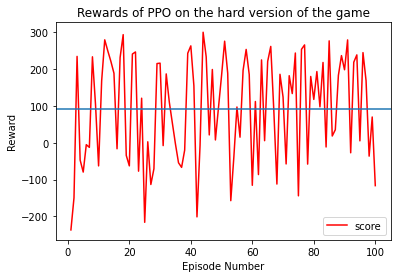

In [15]:
import matplotlib.pyplot as plt
import numpy as np
df.plot(x='episode', y='score', kind='line', color="r")
plt.axhline(y=np.nanmean(df.score))
plt.xlabel("Episode Number")
plt.ylabel("Reward")
plt.title("Rewards of PPO on the hard version of the game")
plt.show()